In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl

In [3]:
df_inicial=pd.read_csv("dataset_IRM_psu_2003-2018 .csv")
df_inicial.tail()

,Sexo,Lenguaje,Matemáticas,Historia,Ciencias,Etiqueta,Año
941,H,639.0,727.0,NaN,659.0,1,2018
942,M,663.0,624.0,NaN,608.0,1,2018
943,H,618.0,794.0,NaN,757.0,1,2018
944,H,618.0,627.0,NaN,583.0,1,2018
945,H,539.0,603.0,640.0,NaN,1,2018


In [4]:
df_inicial['Etiqueta'].replace({0:'B',1:'A'},inplace=True)
df_inicial['Sexo'].replace({'M':'F','H':'M'},inplace=True)


In [20]:
df_inicial

,Sexo,Lenguaje,Matemáticas,Historia,Ciencias,Etiqueta,Año
0,F,616.0,464.0,520.0,484.0,B,2003
1,F,322.0,403.0,346.0,426.0,B,2003
2,F,515.0,614.0,451.0,564.0,B,2003
3,M,786.0,818.0,NaN,683.0,B,2003
4,F,554.0,515.0,569.0,451.0,B,2003
...,...,...,...,...,...,...,...
941,M,639.0,727.0,NaN,659.0,A,2018
942,F,663.0,624.0,NaN,608.0,A,2018
943,M,618.0,794.0,NaN,757.0,A,2018
944,M,618.0,627.0,NaN,583.0,A,2018


In [21]:
#with open('df_inicial.pkl','wb') as f:
 #   pkl.dump(df_inicial,f)

In [6]:
boxplot_historico = df_inicial[['Lenguaje','Matemáticas','Historia','Ciencias','Sexo', 'Año']]
data_general = []
for i in range(len(boxplot_historico.index)):
    for j in range(len(boxplot_historico.columns)):
        if j == 0:
            data_leng = []
            data_leng = ['Lenguaje', boxplot_historico.values[i][0], boxplot_historico.values[i][4],boxplot_historico.values[i][5]]
            data_general.append(data_leng)
            data_leng = []
        elif j == 1:
            data_mat = []
            data_mat = ['Matemáticas', boxplot_historico.values[i][1], boxplot_historico.values[i][4],boxplot_historico.values[i][5] ]
            data_general.append(data_mat)
            data_mat = []
        elif j == 2:
            data_hist = []
            data_hist = ['Historia', boxplot_historico.values[i][2], boxplot_historico.values[i][4],boxplot_historico.values[i][5]]
            data_general.append(data_hist)
            data_hist = []
        elif j == 3:
            data_hist = []
            data_hist = ['Ciencias', boxplot_historico.values[i][3], boxplot_historico.values[i][4],boxplot_historico.values[i][5]]
            data_general.append(data_hist)
            data_hist = []



In [7]:
boxplot_historico.head(300)

,Lenguaje,Matemáticas,Historia,Ciencias,Sexo,Año
0,616.0,464.0,520.0,484.0,F,2003
1,322.0,403.0,346.0,426.0,F,2003
2,515.0,614.0,451.0,564.0,F,2003
3,786.0,818.0,NaN,683.0,M,2003
4,554.0,515.0,569.0,451.0,F,2003
...,...,...,...,...,...,...
295,524.0,509.0,564.0,356.0,M,2009
296,479.0,509.0,471.0,NaN,M,2009
297,639.0,540.0,570.0,NaN,M,2009
298,468.0,569.0,NaN,492.0,F,2009


In [8]:
df_boxplots = pd.DataFrame(data_general, columns = ['Asignatura','Puntaje','Genero','Año'])


In [9]:
##with open('df_boxplots.pkl','wb') as f:
  #  pkl.dump(df_boxplots,f)

In [10]:
df_boxplots.head()

,Asignatura,Puntaje,Genero,Año
0,Lenguaje,616.0,F,2003
1,Matemáticas,464.0,F,2003
2,Historia,520.0,F,2003
3,Ciencias,484.0,F,2003
4,Lenguaje,322.0,F,2003


In [11]:
Filtro_año = df_boxplots['Año'] == 2009

(array([200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800'),
  Text(0, 900.0, '900')])

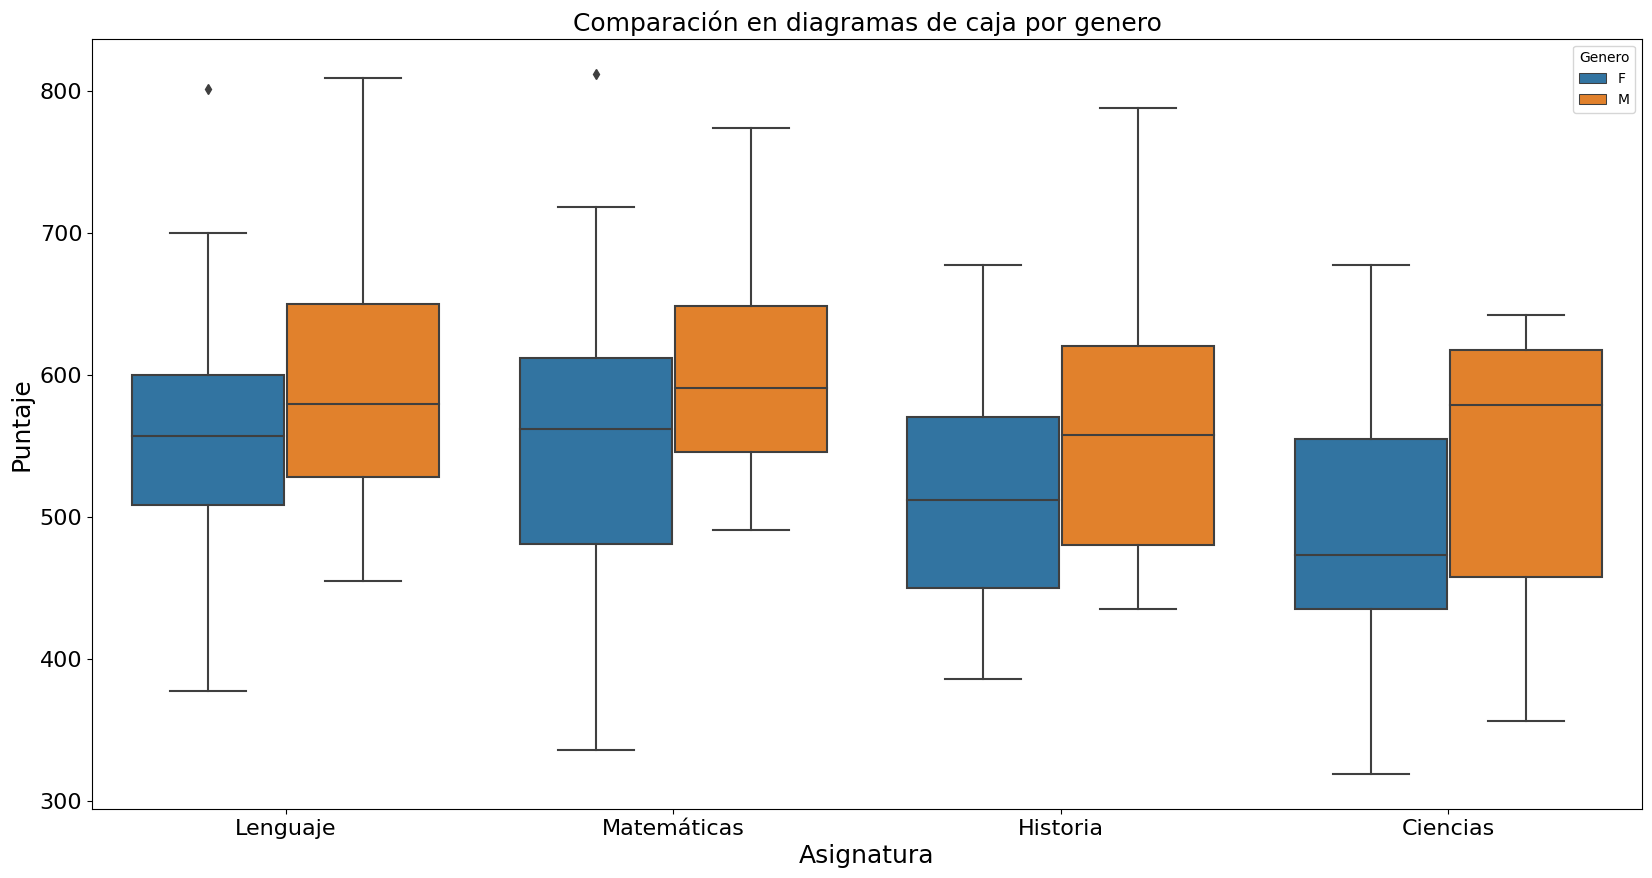

In [12]:
fig = plt.figure(figsize=(20,10), dpi = 100)
sns.boxplot(x="Asignatura", y="Puntaje", hue="Genero", data=df_boxplots[Filtro_año])
plt.title('Comparación en diagramas de caja por genero', fontsize=18)
plt.xlabel('Asignatura', fontsize=18) #agrandando titulo en eje x
plt.ylabel('Puntaje', fontsize=18)
plt.xticks(fontsize=16) #agrandando titulo en eje x del dataframe
plt.yticks(fontsize=16)


C:\Users\HP\AppData\Local\Temp\ipykernel_2928\185227337.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df_inicial.groupby('Año').mean()


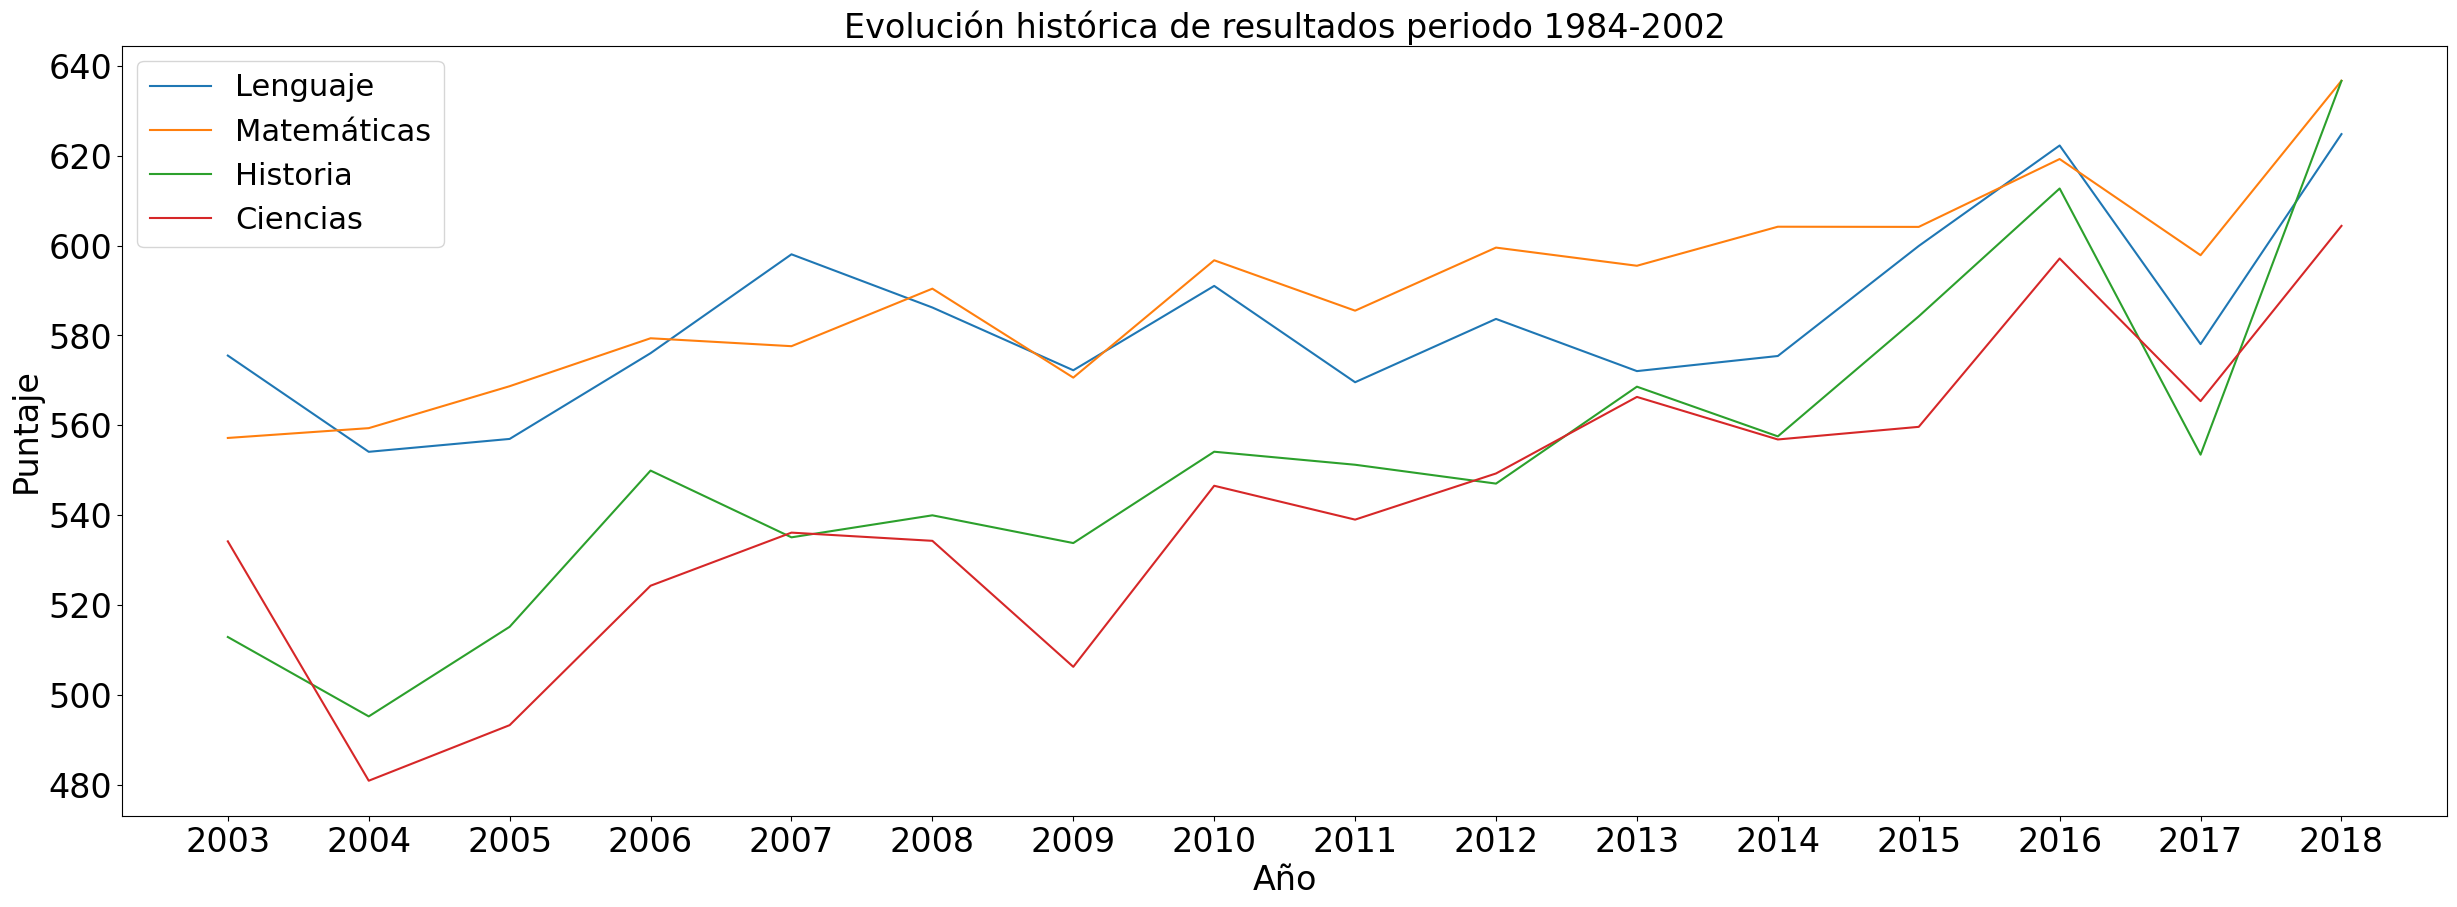

In [19]:
#-----------------------------------------------------------------------------------------------------------------
#calculando las medias para cada año 
means = df_inicial.groupby('Año').mean()
tiempo = means.index
means['Año'] = tiempo
#means['Año'] = pd.to_datetime(means['Año'])

#sacando la grafica de las medias en lineas por año
#fig = plt.figure(figsize=(30,10), dpi = 150)
#ax = plt.gca()
ax = means.plot(kind = 'line', x = 'Año', figsize=(30,10), xticks=means.index)
#means.plot(kind = 'line', x = 'Año', y = 'Matemáticas', figsize=(30,10), xticks=means.index, color='red', ax = ax)
#means.plot(kind = 'line', x = 'Año', y = 'Historia', figsize=(30,10), xticks=means.index)

#ax = means.plot(xticks=means.index)

ax.set_xticklabels(means['Año'])

#plt.xticks(range(len(means.index)), means.index)
#means.set_index('Año')['Lenguaje'].plot()

#ax = means.plot.line(xticks=means.index)
#ax.set_xticklabels(means['Año'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.legend(fontsize=22)

#ax.set_xlabel('xlabel', fontsize=16)
#ax.set_xlabel('xlabel',fontsize = 20) #xlabel
#ax.set_ylabel('ylabel', fontsize = 20)#ylabel

plt.title('Evolución histórica de resultados periodo 1984-2002', fontsize=24)
plt.xlabel('Año', fontsize=24) #agrandando titulo en eje x
plt.ylabel('Puntaje', fontsize=24) #agrandando titulo en eje y
plt.xticks(fontsize=24) #agrandando titulo en eje x del dataframe
plt.yticks(fontsize=24) #agrandando titulo en eje y del dataframe
#plt.savefig('serie.png', dpi = 150)
plt.show()


#calculando las pendientes para indice 0, 1, 2
#for i in range(len(means.index)):
 #  if i <= 19:
  #     delta = means.values[i + 1][2] - means.values[i][2]
   #    print(delta)
    #   delta = 0
#-----------------------------------------------------------------------------------------------------------------
 

In [14]:
means

,Lenguaje,Matemáticas,Historia,Ciencias,Año
Año,,,,,
2003,575.527778,557.194444,512.896552,534.185185,2003
2004,554.111111,559.377778,495.228571,480.914286,2004
2005,556.977778,568.711111,515.171429,493.282051,2005
2006,576.060000,579.380000,549.933333,524.307692,2006
2007,598.063830,577.617021,535.078947,536.125000,2007
2008,586.223881,590.417910,539.977778,534.300000,2008
2009,572.258621,570.620690,533.804878,506.261905,2009
2010,591.031250,596.734375,554.130435,546.555556,2010
2011,569.594203,585.521739,551.232143,539.019231,2011
